In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing

In [65]:
dataset_full = pd.read_csv('BAC.csv',index_col="Date",parse_dates=True)
dataset = dataset_full[:2015]
dataset_test = dataset_full[2015:2517]
#dataset.head()

In [60]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-11,15.320000,15.700000,15.210000,15.630000,14.045665,194958400
2009-12-14,15.670000,15.730000,15.430000,15.630000,14.045665,128586100
2009-12-15,15.450000,15.510000,15.150000,15.190000,13.650263,190193100
2009-12-16,15.330000,15.440000,15.230000,15.280000,13.731138,166373000
2009-12-17,15.270000,15.360000,14.830000,14.860000,13.353713,268907300
...,...,...,...,...,...,...
2017-12-06,28.730000,28.969999,28.570000,28.639999,27.497375,74593800
2017-12-07,28.889999,28.969999,28.370001,28.780001,27.631792,80706100
2017-12-08,29.020000,29.090000,28.760000,29.049999,27.891020,60991300


In [79]:
#Data cleaning
dataset.isna().any()
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset = pd.DataFrame(dataset['Open'])
training_set_scaled = sc.fit_transform(dataset)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train_reg, y_train_reg = X_train, y_train
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Using TensorFlow backend.

In [32]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0185A: 0s - loss: 0.0
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0027
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0019
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 12/100
1198/1198 [==============================] -

1198/1198 [==============================] - 8s 7ms/step - loss: 4.3947e-04
Epoch 94/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.2260e-04
Epoch 95/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.0100e-04
Epoch 96/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.3764e-04
Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.3766e-04
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.0053e-04
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.3652e-04
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.2383e-04


In [91]:
# Getting the real stock price of 2017
#dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
real_stock_price = dataset_test.iloc[:, 1:2].values
# Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 502):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test_reg = X_test
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [92]:
X_test_reg

array([[0.80916981, 0.81660467, 0.82362656, ..., 0.98760843, 0.98802152,
        1.        ],
       [0.81660467, 0.82362656, 0.82197439, ..., 0.98802152, 1.        ,
        0.99958691],
       [0.82362656, 0.82197439, 0.81908306, ..., 1.        , 0.99958691,
        0.98926059],
       ...,
       [0.97439079, 0.96984717, 0.95332511, ..., 0.9822387 , 1.0020653 ,
        0.99586943],
       [0.96984717, 0.95332511, 0.9487815 , ..., 1.0020653 , 0.99586943,
        1.02808757],
       [0.95332511, 0.9487815 , 0.94630318, ..., 0.99586943, 1.02808757,
        1.01486989]])

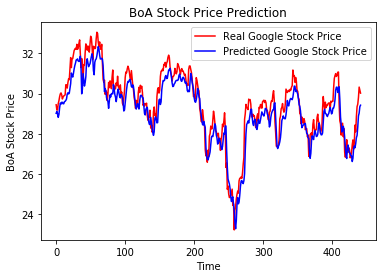

In [93]:
# Visualising the results
plt.plot(real_stock_price[:442], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('BoA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BoA Stock Price')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error
#actual_stock_price = np.reshape(y_test, (-1, 1))
#actual_stock_price_final = sc.inverse_transform(actual_stock_price)
result = mean_squared_error(real_stock_price[:442],predicted_stock_price)

In [95]:
result

0.45692255422596023

In [96]:
# Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
clfreg = LinearRegression()
clfreg.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
predicted_stock_price_reg = clfreg.predict(X_test_reg)
predicted_stock_price_reg = np.reshape(predicted_stock_price_reg, (-1, 1))
predicted_stock_price_reg = sc.inverse_transform(predicted_stock_price_reg)

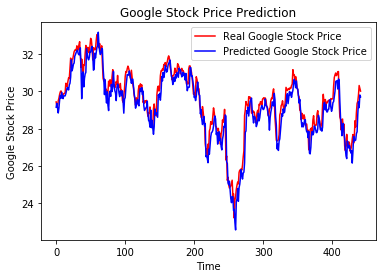

In [119]:
# Visualising the results
plt.plot(real_stock_price[:442], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_reg, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [120]:
result = mean_squared_error(real_stock_price[:442],predicted_stock_price_reg)

In [121]:
result

0.37993907956994977

In [122]:
from sklearn.feature_selection import SelectFromModel
import xgboost
from xgboost import XGBRegressor

regr6 = XGBRegressor(n_estimators=1000)
   
#Passing features and target value to perform XGBoost Regression
regr6.fit(X_train_reg, y_train_reg)

[23:00:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [124]:
predicted_stock_price_xgb = regr6.predict(X_test_reg)
predicted_stock_price_xgb = np.reshape(predicted_stock_price_xgb, (-1, 1))
predicted_stock_price_xgb = sc.inverse_transform(predicted_stock_price_xgb)

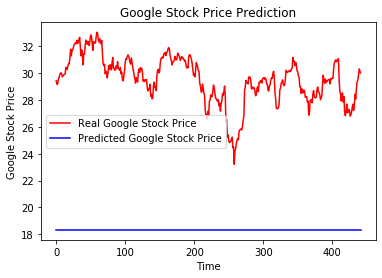

In [125]:
# Visualising the results
plt.plot(real_stock_price[:442], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_xgb, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [112]:
result = mean_squared_error(real_stock_price[:442],predicted_stock_price_reg)

In [113]:
result

128.6087954503977